In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from utility_functions import SquaredHingeLoss
from MLP import mlp_training

In [2]:
def plot_solution(x, y_start, y_end, sol):
    plt.scatter(x, y_start, color='r', s=2, label='min.log.lambda')
    plt.scatter(x, y_end,   color='b', s=2, label='max.log.lambda')

    sorted_indices = sorted(range(len(x)), key=lambda i: x[i])
    sorted_x = [x[i] for i in sorted_indices]
    sorted_sol = [sol[i] for i in sorted_indices]
    plt.plot(sorted_x, sorted_sol)
    plt.legend()
    plt.grid(True)
    plt.show()

In [3]:
# print loss value
def print_loss_value(prediction, outputs_df):
    loss_func = SquaredHingeLoss()
    targets_low  = torch.Tensor(outputs_df['min.log.lambda'].to_numpy().reshape(-1,1))
    targets_high = torch.Tensor(outputs_df['max.log.lambda'].to_numpy().reshape(-1,1))
    target = torch.cat((targets_low, targets_high), dim=1)
    print(loss_func(prediction, target).item())

In [4]:
# PATHs (edit these paths depending on dataset)
dataset = 'detailed'

# training data
fold_path = 'training_data/' + dataset + '/folds.csv'
inputs_path = 'training_data/' + dataset + '/inputs.csv'
outputs_path = 'training_data/' + dataset + '/outputs.csv'

# raw dfs
fold = 1
fold_df = pd.read_csv(fold_path)
inputs_df = pd.read_csv(inputs_path)
outputs_df = pd.read_csv(outputs_path)

# fold dfs
inputs_df = inputs_df[inputs_df['sequenceID'].isin(fold_df[fold_df['fold'] == 1]['sequenceID'])]
outputs_df = outputs_df[outputs_df['sequenceID'].isin(fold_df[fold_df['fold'] == 1]['sequenceID'])]

# feature engineering transformation
identity = lambda x: x
log      = lambda x: np.log(x)
loglog   = lambda x: np.log(np.log(x))

In [5]:
x = inputs_df['length'].to_numpy()
x = loglog(x)
y_start = outputs_df['min.log.lambda'].to_numpy()
y_end   = outputs_df['max.log.lambda'].to_numpy()

In [6]:
# model, _ = mlp_training(
#     inputs_df = inputs_df, 
#     outputs_df = outputs_df, 
#     hidden_layers = 0, 
#     hidden_size = 100, 
#     chosen_feature = ['length'], 
#     f_engineer = [loglog],
#     normalize = 0,
#     batch_size = inputs_df.shape[0],
#     margin = 1,
#     n_ites = 20000,
#     lr = 0.001,
#     patience = 50,
#     verbose = 1,
#     epoch_step = 1000)

In [7]:
# 0, loss: 0.4881119430065155
# 1000, loss: 0.4294413626194
# 2000, loss: 0.3998805582523346
# 3000, loss: 0.3714159429073334
# 4000, loss: 0.34759217500686646
# 5000, loss: 0.32999324798583984
# 6000, loss: 0.31792396306991577
# 7000, loss: 0.3102208375930786
# 8000, loss: 0.3059645891189575
# 9000, loss: 0.30383333563804626
# 10000, loss: 0.30309468507766724
# 11000, loss: 0.30295348167419434
# Stopping early at epoch 11596, loss: 0.3029453456401825

0.3054782450199127


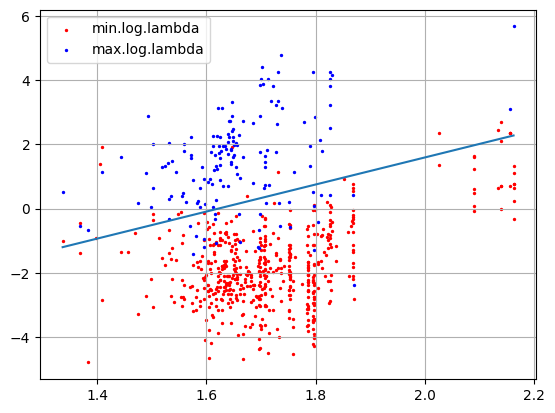

In [8]:
toby_df = pd.read_csv('0_test_code/toby_sol/linear_fold1.csv')
toby_sol = toby_df['3108'].to_numpy().reshape(-1,1)
print_loss_value(torch.Tensor(toby_sol), outputs_df)
plot_solution(x, y_start, y_end, toby_sol)

In [9]:
# model_2, _ = mlp_training(
#     inputs_df = inputs_df, 
#     outputs_df = outputs_df, 
#     hidden_layers = 0, 
#     hidden_size = 100, 
#     chosen_feature = ['length', 'sd'], 
#     f_engineer = [loglog, log],
#     normalize = 0,
#     batch_size = inputs_df.shape[0],
#     margin = 1,
#     n_ites = 20000,
#     lr = 0.001,
#     patience = 1000,
#     verbose = 1,
#     epoch_step = 1000)

In [10]:
# 0, loss: 0.48794201016426086
# 1000, loss: 0.32225751876831055
# 2000, loss: 0.2821555733680725
# 3000, loss: 0.2591114938259125
# 4000, loss: 0.23894260823726654
# 5000, loss: 0.22395886480808258
# 6000, loss: 0.2138167768716812
# 7000, loss: 0.20730185508728027
# 8000, loss: 0.20337918400764465
# 9000, loss: 0.20155228674411774
# 10000, loss: 0.20116254687309265
# 11000, loss: 0.20111137628555298
# 12000, loss: 0.20110921561717987
# 13000, loss: 0.20110921561717987
# Stopping early at epoch 13142, loss: 0.2011091709136963

In [11]:
# model_4, _ = mlp_training(
#     inputs_df = inputs_df, 
#     outputs_df = outputs_df, 
#     hidden_layers = 0, 
#     hidden_size = 100, 
#     chosen_feature = ['length', 'sd', 'range_value', 'sum_diff'], 
#     f_engineer = [loglog, log, log, log],
#     normalize = 0,
#     batch_size = inputs_df.shape[0],
#     margin = 1,
#     n_ites = 20000,
#     lr = 0.001,
#     patience = 1000,
#     verbose = 1,
#     epoch_step = 1000)

In [12]:
# 0, loss: 0.4861992299556732
# 1000, loss: 0.18969111144542694
# 2000, loss: 0.17610788345336914
# 3000, loss: 0.17295695841312408
# 4000, loss: 0.17204593122005463
# 5000, loss: 0.1715322583913803
# 6000, loss: 0.17092864215373993
# 7000, loss: 0.1702381819486618
# 8000, loss: 0.16964146494865417
# 9000, loss: 0.16929826140403748
# 10000, loss: 0.16909858584403992
# 11000, loss: 0.16902966797351837
# 12000, loss: 0.1690259873867035
# 13000, loss: 0.1690245121717453
# 14000, loss: 0.16902385652065277
# 15000, loss: 0.16902530193328857
# Stopping early at epoch 15941, loss: 0.16902364790439606

In [13]:
# model_mlp, _ = mlp_training(
#     inputs_df = inputs_df, 
#     outputs_df = outputs_df, 
#     hidden_layers = 3, 
#     hidden_size = 4,
#     chosen_feature = ['length', 'sd', 'range_value', 'sum_diff'], 
#     f_engineer = [loglog, log, log, log],
#     normalize = 1,
#     batch_size = inputs_df.shape[0],
#     margin = 1,
#     n_ites = 50000,
#     lr = 0.001,
#     patience = 1000,
#     verbose = 1,
#     epoch_step = 1000)

In [14]:
# 0, loss: 42.092010498046875
# 1000, loss: 1.0151056051254272
# 2000, loss: 0.2311525195837021
# 3000, loss: 0.18444198369979858
# 4000, loss: 0.1726098656654358
# 5000, loss: 0.16450317203998566
# 6000, loss: 0.15825608372688293
# 7000, loss: 0.1519222855567932
# 8000, loss: 0.14504346251487732
# 9000, loss: 0.1383095681667328
# 10000, loss: 0.1337801069021225
# 11000, loss: 0.13151724636554718
# 12000, loss: 0.13033485412597656
# 13000, loss: 0.1298772543668747
# 14000, loss: 0.12523579597473145
# 15000, loss: 0.1236480250954628
# 16000, loss: 0.12290910631418228
# 17000, loss: 0.12086749076843262
# 18000, loss: 0.12046444416046143
# 19000, loss: 0.12024728953838348
# 20000, loss: 0.11974845081567764
# 21000, loss: 0.11961543560028076
# 22000, loss: 0.11953962594270706
# 23000, loss: 0.11948926746845245
# 24000, loss: 0.11944900453090668
# 25000, loss: 0.11942745000123978
# 26000, loss: 0.11939682066440582
# 27000, loss: 0.11940763145685196
# 28000, loss: 0.1193372830748558
# 29000, loss: 0.1193062886595726
# 30000, loss: 0.11929105222225189
# 31000, loss: 0.11927163600921631
# 32000, loss: 0.11926548182964325
# 33000, loss: 0.11925406008958817
# 34000, loss: 0.11923001706600189
# 35000, loss: 0.11921203881502151
# 36000, loss: 0.11919518560171127
# 37000, loss: 0.11917450278997421
# 38000, loss: 0.11917560547590256
# 39000, loss: 0.11916269361972809
# 40000, loss: 0.11916510760784149
# 41000, loss: 0.11915144324302673
# 42000, loss: 0.11914500594139099
# 43000, loss: 0.1191706657409668
# 44000, loss: 0.1191532239317894
# 45000, loss: 0.11913051456212997
# 46000, loss: 0.11912236362695694
# 47000, loss: 0.11912406235933304
# 48000, loss: 0.11911841481924057
# 49000, loss: 0.1191587820649147
# 50000, loss: 0.1191110908985138

0, loss: 565.6719970703125
1000, loss: 44.44081115722656
2000, loss: 1.539783000946045
3000, loss: 0.7328954339027405
4000, loss: 0.7020131945610046
5000, loss: 0.6942275762557983
6000, loss: 0.6818987727165222
7000, loss: 0.6626378297805786
8000, loss: 0.6335524320602417
9000, loss: 0.5918169617652893
10000, loss: 0.5362625122070312
11000, loss: 0.4704720973968506
12000, loss: 0.40215733647346497
13000, loss: 0.34558695554733276
14000, loss: 0.3142338991165161
15000, loss: 0.3045136630535126
16000, loss: 0.3030075430870056
17000, loss: 0.30294570326805115
Stopping early at epoch 17835, loss: 0.3029478192329407


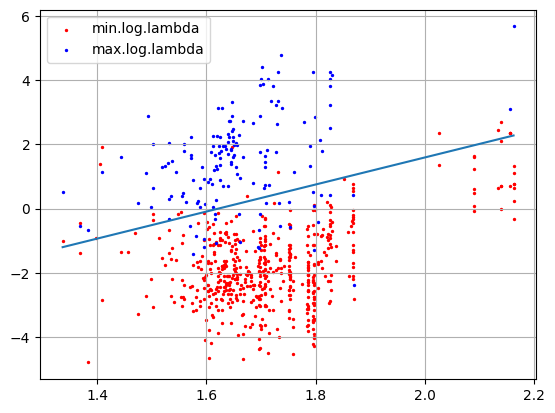

In [15]:
model_mlp, _ = mlp_training(
    inputs_df = inputs_df, 
    outputs_df = outputs_df, 
    hidden_layers = 1, 
    hidden_size = 8,
    chosen_feature = ['length'], 
    f_engineer = [loglog],
    normalize = 0,
    batch_size = inputs_df.shape[0],
    margin = 1,
    n_ites = 50000,
    lr = 0.001,
    patience = 1000,
    verbose = 1,
    epoch_step = 1000)

sol = model_mlp(torch.Tensor(x).reshape(-1,1)).detach().numpy()
plot_solution(x, y_start, y_end, sol)